# XSENS DATASET

1. Import Modules

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

#single model classifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#ensemble model classifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

2. Dataset Information

In [2]:
xsens = pd.read_csv('C:\\Users\\Husna\\OneDrive\\Xsens_DOT_Dataset\\Xsens_real_data.csv')
xsens.head()

,Count,Subject,Activities,SampleTime,righand_X,righand_Y,righand_Z,lefhand_X,lefhand_Y,lefhand_Z,righleg_X,righleg_Y,righleg_Z,leftleg_X,leftleg_Y,leftleg_Z
0,1,Person_1,walking,670766256,0.028935,0.027478,0.037234,-0.041460,0.005921,-0.028712,0.000000,0.000000,0.000000,0.044180,-0.031337,0.004517
1,2,Person_1,walking,670816257,0.013471,0.027923,0.032386,-0.062768,0.010287,-0.035726,0.012397,0.062873,0.006475,-0.002785,-0.025221,0.006460
2,3,Person_1,walking,670866258,0.002567,0.017387,0.027406,-0.063115,0.015910,-0.034911,0.008060,0.064288,0.002522,0.010671,-0.016937,0.003584
3,4,Person_1,walking,670916259,0.004788,0.007903,0.014665,-0.054703,0.015440,-0.030487,-0.007127,0.048914,0.010555,0.020001,-0.010244,-0.000025
4,5,Person_1,walking,670966260,0.014261,0.000698,-0.000924,-0.045396,0.017277,-0.029664,0.015164,0.037313,0.010920,0.026397,-0.004927,-0.002133


In [3]:
xsens.shape

(25100, 16)

In [4]:
xsens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25100 entries, 0 to 25099
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Count       25100 non-null  int64  
 1   Subject     25100 non-null  object 
 2   Activities  25100 non-null  object 
 3   SampleTime  25100 non-null  int64  
 4   righand_X   25100 non-null  float64
 5   righand_Y   25100 non-null  float64
 6   righand_Z   25100 non-null  float64
 7   lefhand_X   25100 non-null  float64
 8   lefhand_Y   25100 non-null  float64
 9   lefhand_Z   25100 non-null  float64
 10  righleg_X   25100 non-null  float64
 11  righleg_Y   25100 non-null  float64
 12  righleg_Z   25100 non-null  float64
 13  leftleg_X   25100 non-null  float64
 14  leftleg_Y   25100 non-null  float64
 15  leftleg_Z   25100 non-null  float64
dtypes: float64(12), int64(2), object(2)
memory usage: 3.1+ MB


In [5]:
Fs = 20 #frequency
Activity = xsens['Activities'].value_counts().index
Activity

Index(['jogging', 'sitting', 'standing', 'walking', 'downstair', 'upstair'], dtype='object')

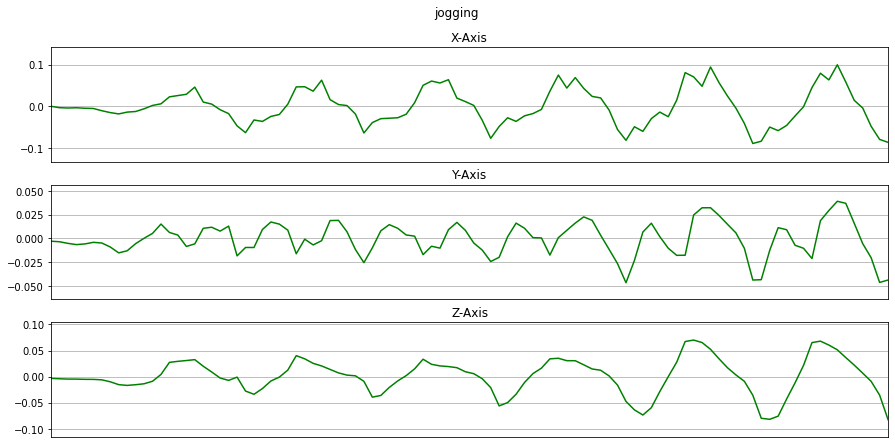

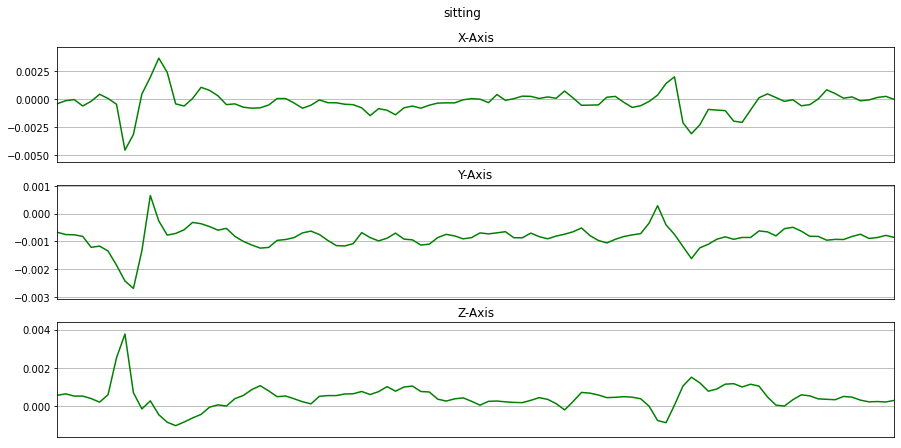

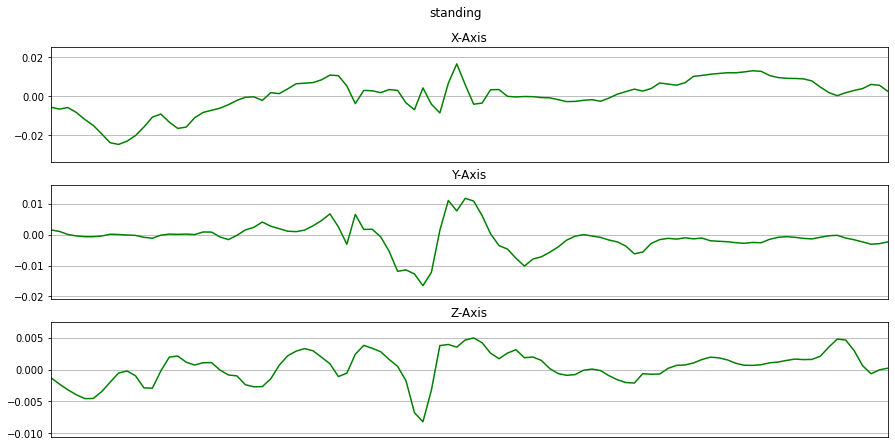

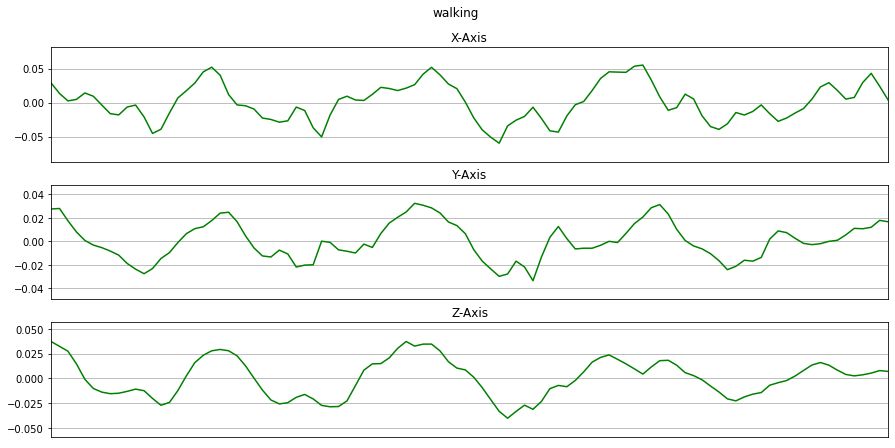

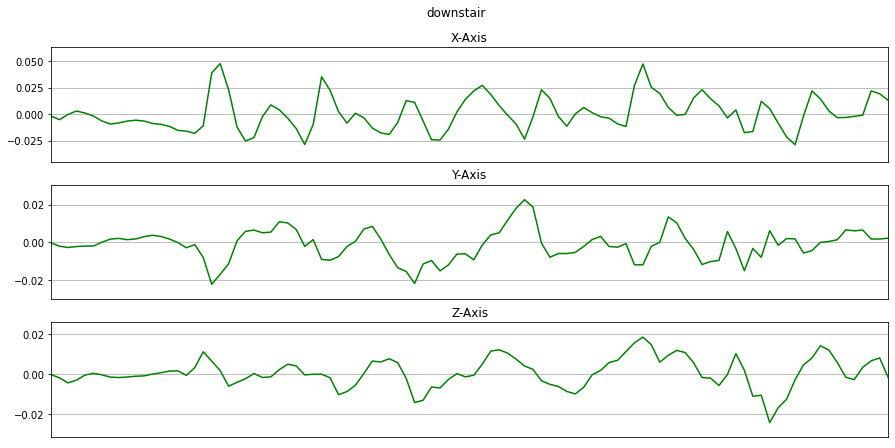

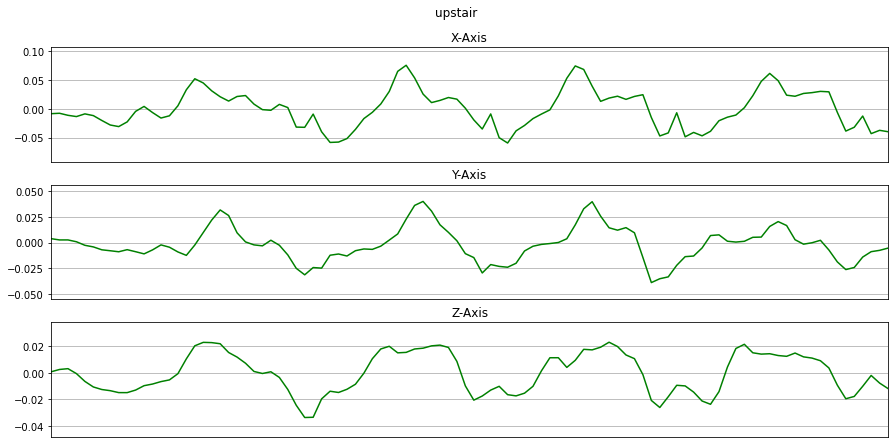

In [6]:
#Righthand
def plot_Activities(Activities, xsens):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, xsens['SampleTime'], xsens['righand_X'], 'X-Axis')
    plot_axis(ax1, xsens['SampleTime'], xsens['righand_Y'], 'Y-Axis')
    plot_axis(ax2, xsens['SampleTime'], xsens['righand_Z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(Activities)
    plt.subplots_adjust(top=0.90)
    plt.show()
    
def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for Activities in Activity:
    xsens_for_plot = xsens[(xsens['Activities'] == Activities)][:Fs*5]
    plot_Activities(Activities, xsens_for_plot)

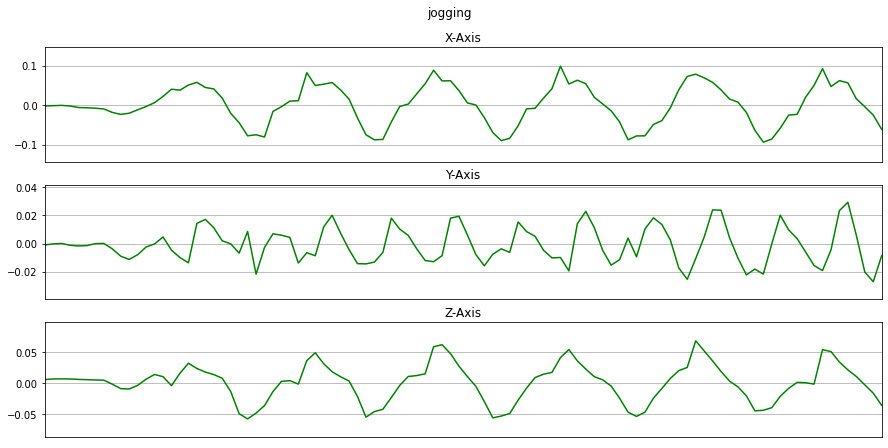

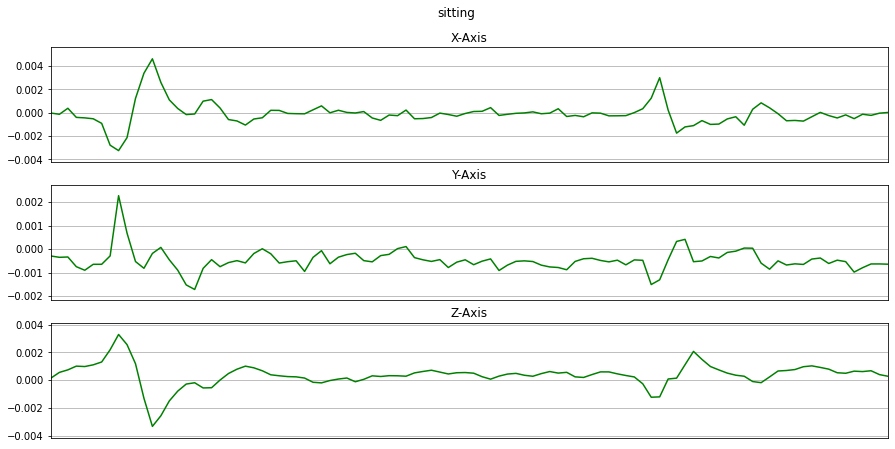

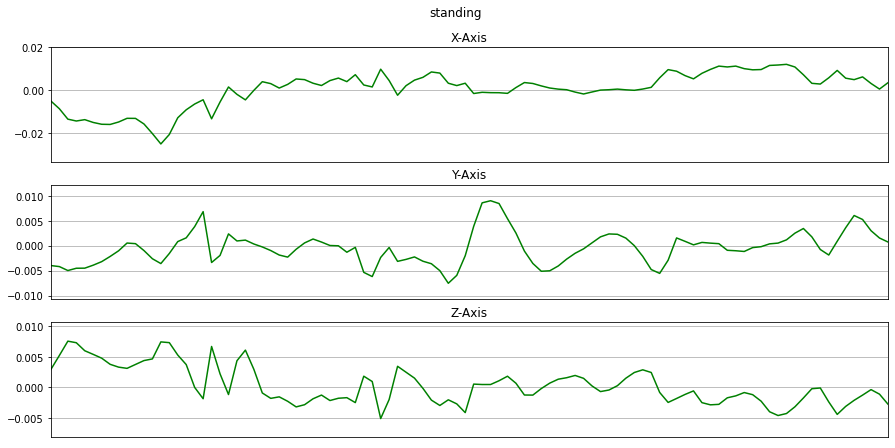

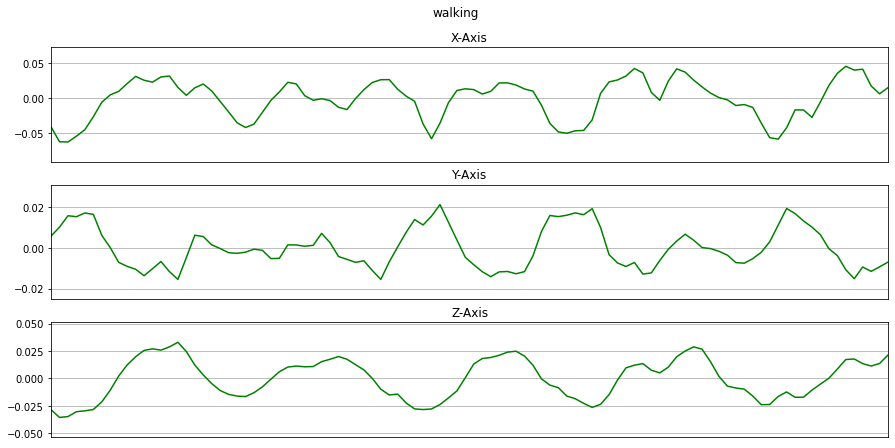

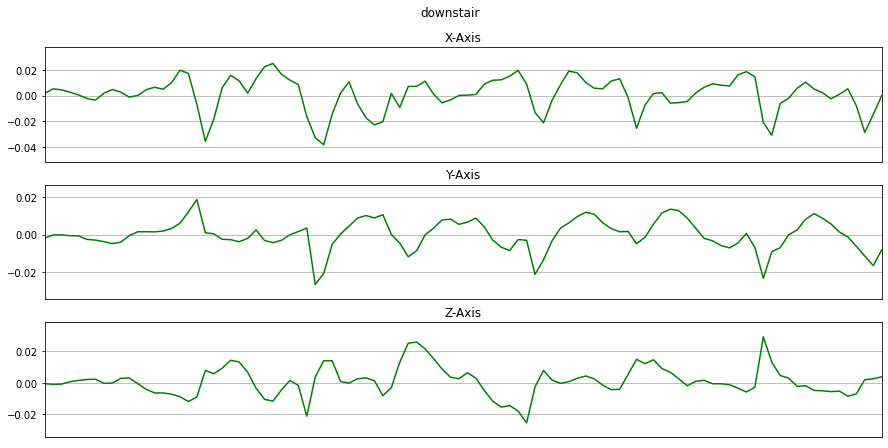

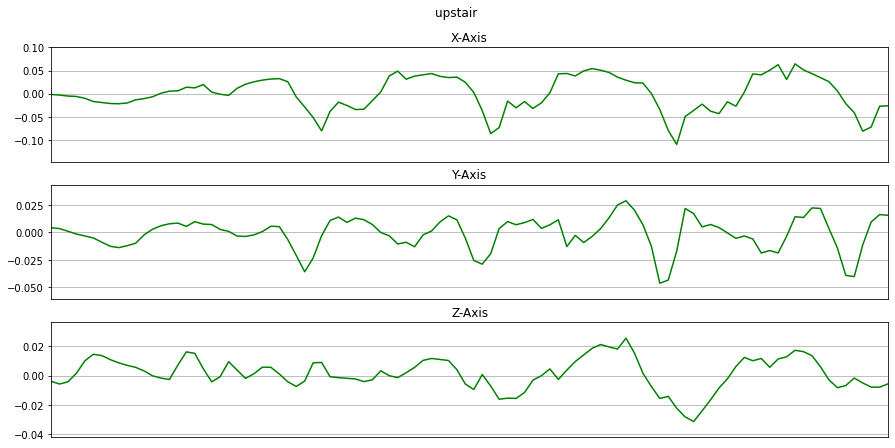

In [7]:
#Lefthand
def plot_Activities(Activities, xsens):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, xsens['SampleTime'], xsens['lefhand_X'], 'X-Axis')
    plot_axis(ax1, xsens['SampleTime'], xsens['lefhand_Y'], 'Y-Axis')
    plot_axis(ax2, xsens['SampleTime'], xsens['lefhand_Z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(Activities)
    plt.subplots_adjust(top=0.90)
    plt.show()
    
def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for Activities in Activity:
    xsens_for_plot = xsens[(xsens['Activities'] == Activities)][:Fs*5]
    plot_Activities(Activities, xsens_for_plot)

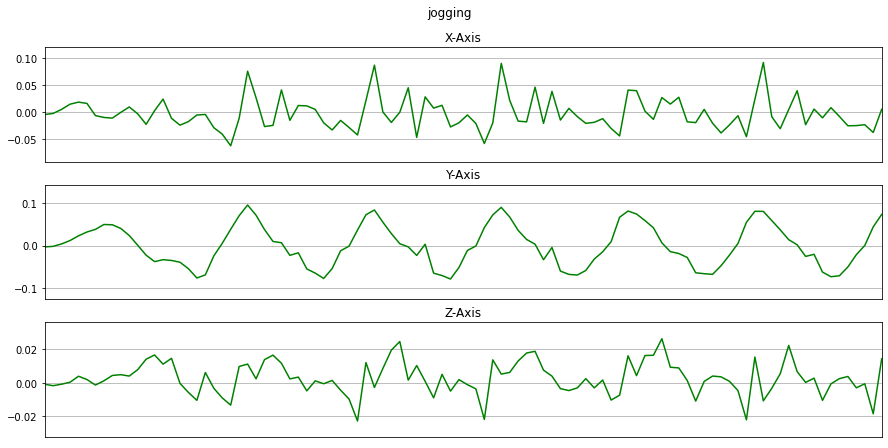

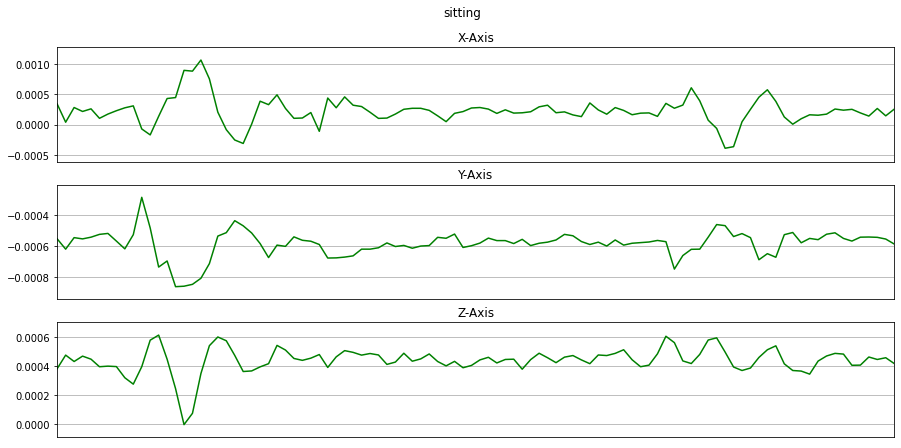

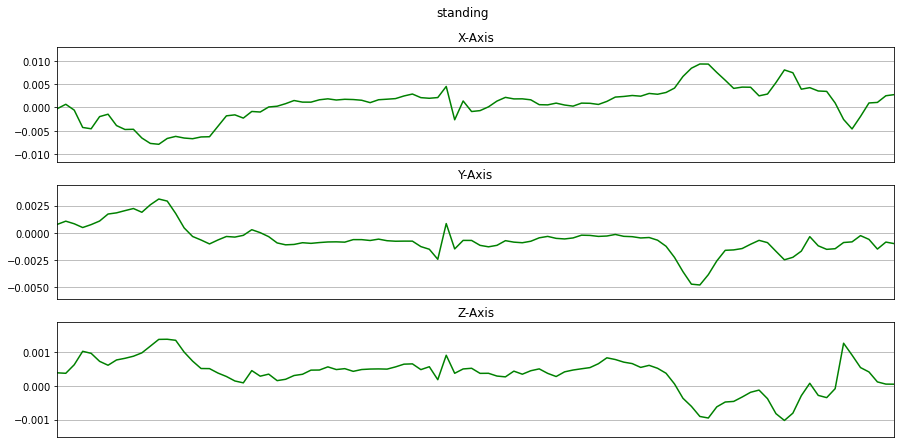

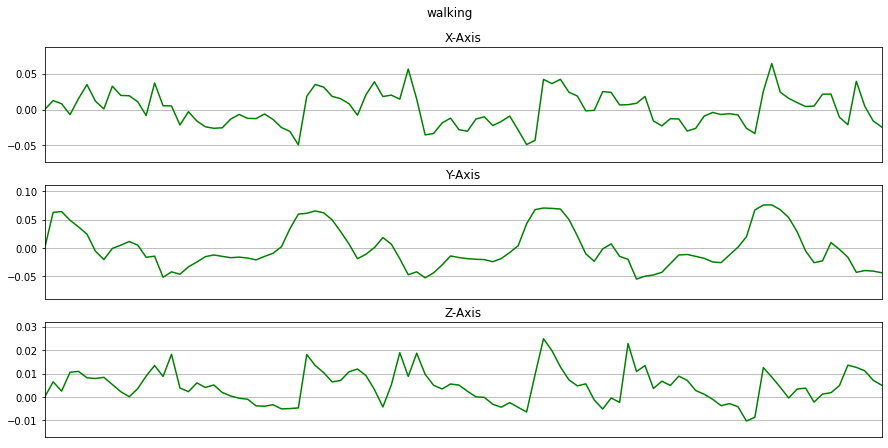

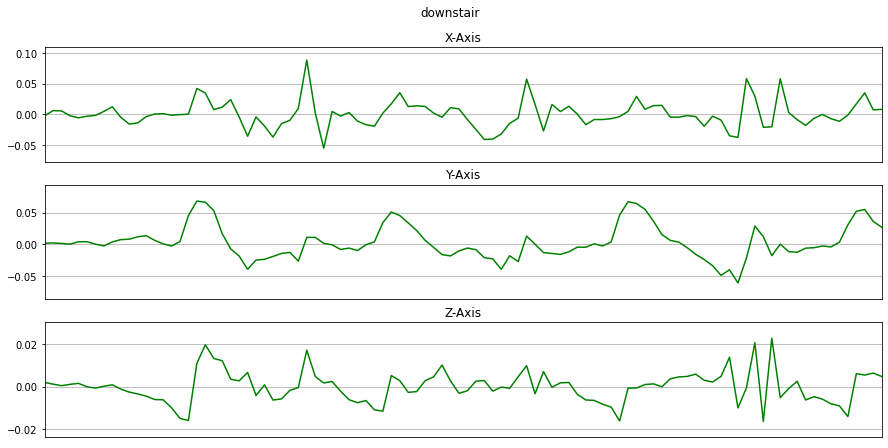

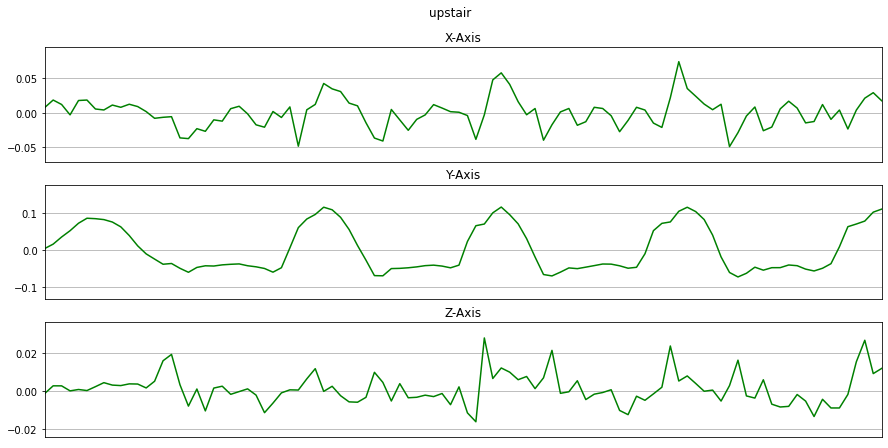

In [8]:
#Rightleg
def plot_Activities(Activities, xsens):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, xsens['SampleTime'], xsens['righleg_X'], 'X-Axis')
    plot_axis(ax1, xsens['SampleTime'], xsens['righleg_Y'], 'Y-Axis')
    plot_axis(ax2, xsens['SampleTime'], xsens['righleg_Z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(Activities)
    plt.subplots_adjust(top=0.90)
    plt.show()
    
def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for Activities in Activity:
    xsens_for_plot = xsens[(xsens['Activities'] == Activities)][:Fs*5]
    plot_Activities(Activities, xsens_for_plot)

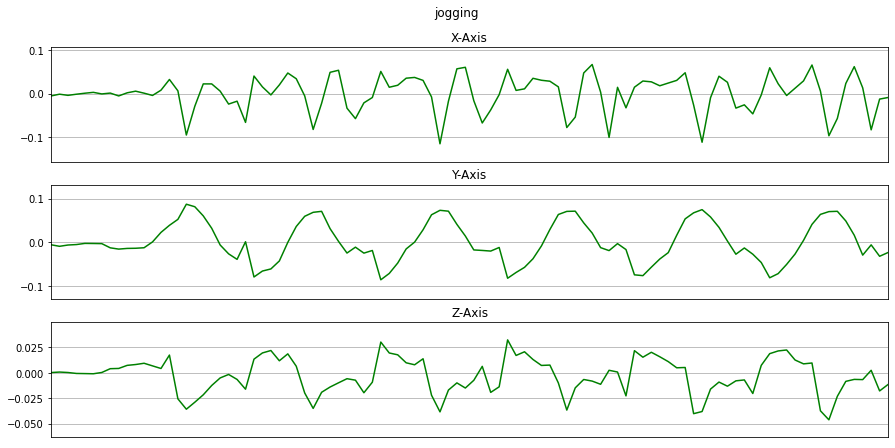

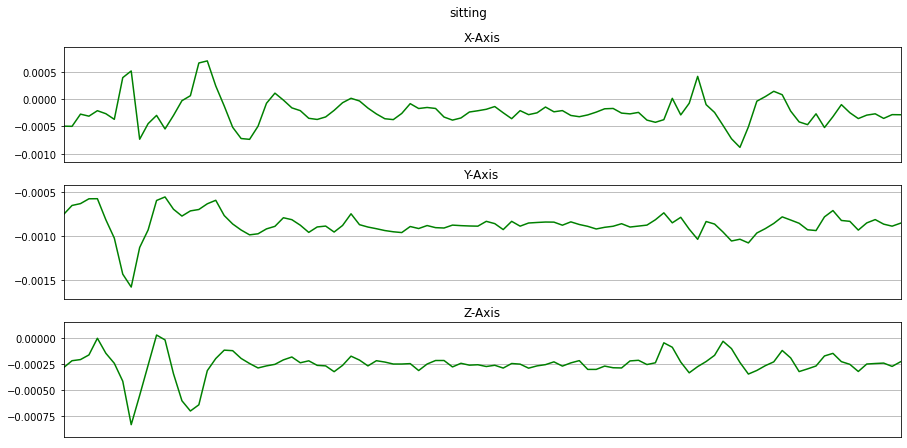

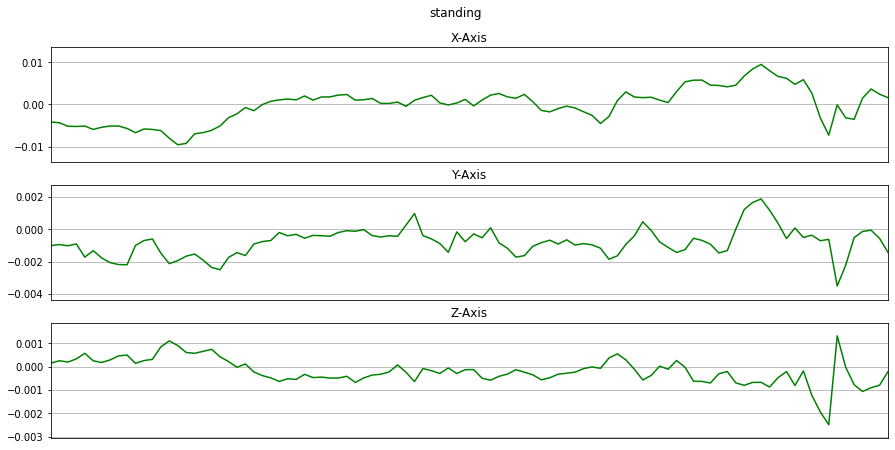

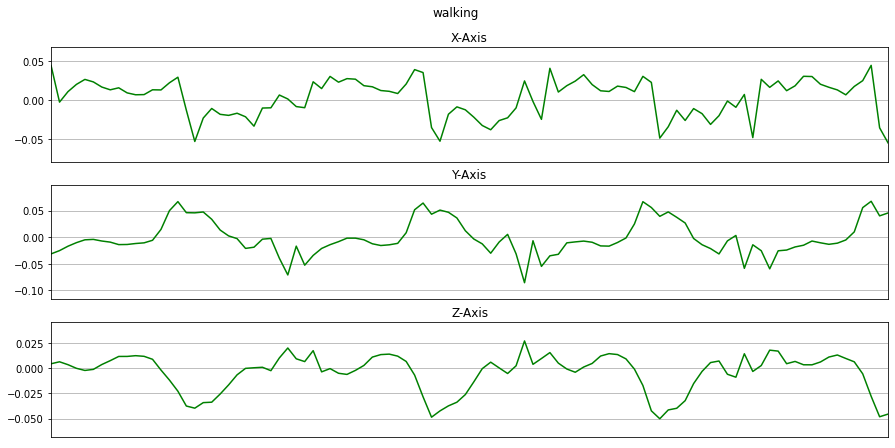

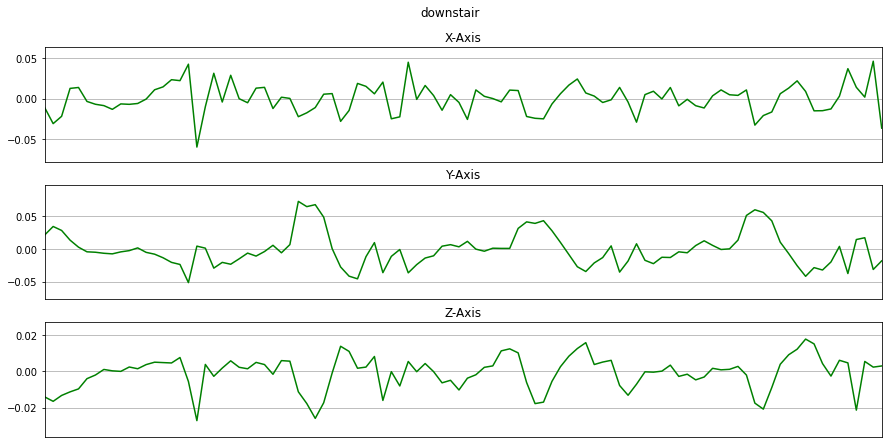

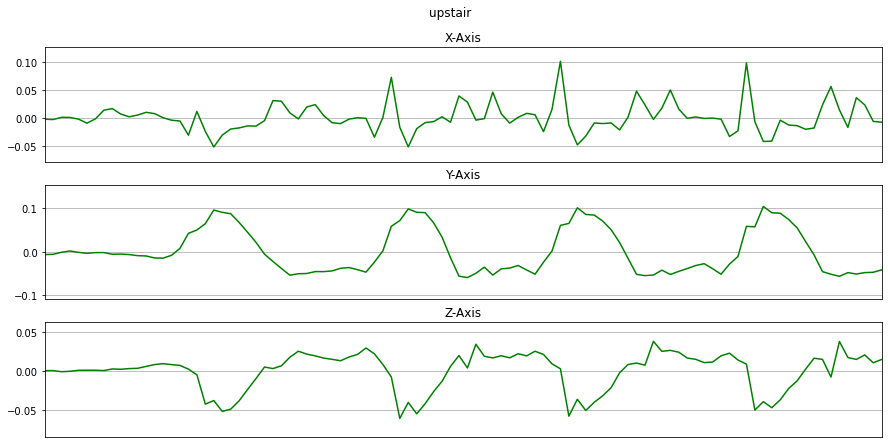

In [9]:
#Leftleg
def plot_Activities(Activities, xsens):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, xsens['SampleTime'], xsens['leftleg_X'], 'X-Axis')
    plot_axis(ax1, xsens['SampleTime'], xsens['leftleg_Y'], 'Y-Axis')
    plot_axis(ax2, xsens['SampleTime'], xsens['leftleg_Z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(Activities)
    plt.subplots_adjust(top=0.90)
    plt.show()
    
def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for Activities in Activity:
    xsens_for_plot = xsens[(xsens['Activities'] == Activities)][:Fs*5]
    plot_Activities(Activities, xsens_for_plot)

In [10]:
xsensnew = xsens.drop(['Count', 'Subject','SampleTime'], axis = 1).copy()
xsensnew.head(10)

,Activities,righand_X,righand_Y,righand_Z,lefhand_X,lefhand_Y,lefhand_Z,righleg_X,righleg_Y,righleg_Z,leftleg_X,leftleg_Y,leftleg_Z
0,walking,0.028935,0.027478,0.037234,-0.041460,0.005921,-0.028712,0.000000,0.000000,0.000000,0.044180,-0.031337,0.004517
1,walking,0.013471,0.027923,0.032386,-0.062768,0.010287,-0.035726,0.012397,0.062873,0.006475,-0.002785,-0.025221,0.006460
2,walking,0.002567,0.017387,0.027406,-0.063115,0.015910,-0.034911,0.008060,0.064288,0.002522,0.010671,-0.016937,0.003584
3,walking,0.004788,0.007903,0.014665,-0.054703,0.015440,-0.030487,-0.007127,0.048914,0.010555,0.020001,-0.010244,-0.000025
4,walking,0.014261,0.000698,-0.000924,-0.045396,0.017277,-0.029664,0.015164,0.037313,0.010920,0.026397,-0.004927,-0.002133
5,walking,0.009378,-0.003241,-0.010179,-0.026749,0.016594,-0.028465,0.034662,0.024487,0.008190,0.023192,-0.004130,-0.001085
6,walking,-0.003536,-0.005428,-0.013839,-0.005864,0.006215,-0.021519,0.011660,-0.005396,0.007892,0.016596,-0.007185,0.003731
7,walking,-0.016201,-0.008351,-0.015414,0.004668,0.000205,-0.010778,0.000858,-0.020206,0.008386,0.013024,-0.009262,0.007603
8,walking,-0.018093,-0.011792,-0.014969,0.009789,-0.007094,0.002125,0.032492,-0.000659,0.005325,0.015605,-0.013923,0.011773
9,walking,-0.006489,-0.018893,-0.013084,0.020956,-0.009042,0.012238,0.019610,0.005094,0.002266,0.009078,-0.013684,0.011803


In [11]:
xsensnew['Activities'].value_counts()

jogging      6000
sitting      6000
standing     6000
walking      5776
downstair     724
upstair       600
Name: Activities, dtype: int64

In [12]:
sitting= xsensnew[xsensnew['Activities']=='sitting'].head(600).copy()
standing= xsensnew[xsensnew['Activities']=='standing'].head(600).copy()
jogging= xsensnew[xsensnew['Activities']=='jogging'].head(600).copy()
walking = xsensnew[xsensnew['Activities']=='walking'].head(600).copy()
downstair= xsensnew[xsensnew['Activities']=='downstair'].head(600).copy()
upstair= xsensnew[xsensnew['Activities']=='upstair'].copy()

3. Balance Data

In [13]:
balanced_xsens = pd.DataFrame()
balanced_xsens = balanced_xsens.append([sitting, standing, jogging, walking, upstair, downstair])
balanced_xsens.shape

C:\Users\Husna\AppData\Local\Temp\ipykernel_9816\644299203.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_xsens = balanced_xsens.append([sitting, standing, jogging, walking, upstair, downstair])


(3600, 13)

In [14]:
balanced_xsens['Activities'].value_counts()

sitting      600
standing     600
jogging      600
walking      600
upstair      600
downstair    600
Name: Activities, dtype: int64

In [15]:
label = LabelEncoder()
balanced_xsens['label'] = label.fit_transform(balanced_xsens['Activities'])
balanced_xsens.head()

,Activities,righand_X,righand_Y,righand_Z,lefhand_X,lefhand_Y,lefhand_Z,righleg_X,righleg_Y,righleg_Z,leftleg_X,leftleg_Y,leftleg_Z,label
2000,sitting,-0.000413,-0.000673,0.000552,-0.000028,-0.000292,0.000154,0.000338,-0.000555,0.000381,-0.000495,-0.000757,-0.000284,2
2001,sitting,-0.000143,-0.000755,0.000626,-0.000133,-0.000348,0.000564,0.000039,-0.000621,0.000474,-0.000498,-0.000654,-0.000217,2
2002,sitting,-0.000043,-0.000763,0.000510,0.000381,-0.000334,0.000746,0.000281,-0.000547,0.000430,-0.000275,-0.000633,-0.000206,2
2003,sitting,-0.000612,-0.000820,0.000511,-0.000398,-0.000747,0.001014,0.000216,-0.000555,0.000467,-0.000312,-0.000578,-0.000161,2
2004,sitting,-0.000198,-0.001213,0.000380,-0.000441,-0.000899,0.000985,0.000259,-0.000544,0.000446,-0.000212,-0.000577,0.000000,2


In [16]:
label.classes_

array(['downstair', 'jogging', 'sitting', 'standing', 'upstair',
       'walking'], dtype=object)

4. Normalization/Standardization

In [17]:
X = balanced_xsens[['righand_X', 'righand_Y','righand_Z', 'lefhand_X', 'lefhand_Y', 'lefhand_Z', 'righleg_X', 'righleg_Y', 'righleg_Z', 'leftleg_X', 'leftleg_Y', 'leftleg_Z']]
y = balanced_xsens['label']

In [18]:
scaler = StandardScaler()
#scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['righand_X', 'righand_Y','righand_Z', 'lefhand_X', 'lefhand_Y', 'lefhand_Z', 'righleg_X', 'righleg_Y', 'righleg_Z', 'leftleg_X', 'leftleg_Y', 'leftleg_Z'])
scaled_X['label'] = y.values

scaled_X

,righand_X,righand_Y,righand_Z,lefhand_X,lefhand_Y,lefhand_Z,righleg_X,righleg_Y,righleg_Z,leftleg_X,leftleg_Y,leftleg_Z,label
0,-0.000551,0.026806,0.028248,0.012239,0.017433,-0.024944,0.038454,-0.015248,-0.145845,-0.019368,0.003750,0.079098,2
1,0.008225,0.020075,0.031499,0.008911,0.012417,-0.005122,0.025649,-0.017311,-0.134479,-0.019484,0.007006,0.083968,2
2,0.011475,0.019418,0.026402,0.025202,0.013671,0.003677,0.036013,-0.014998,-0.139856,-0.010891,0.007670,0.084767,2
3,-0.007019,0.014739,0.026446,0.000511,-0.023320,0.016634,0.033229,-0.015248,-0.135334,-0.012317,0.009409,0.088038,2
4,0.006437,-0.017523,0.020690,-0.000852,-0.036934,0.015232,0.035071,-0.014904,-0.137901,-0.008464,0.009441,0.099738,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,-0.126561,1.055992,-0.165081,0.083205,0.222452,-0.169644,-0.398104,0.484893,0.218250,-0.410080,1.005393,-0.524984,0
3596,-0.262679,0.571486,0.153165,-0.405159,0.452012,-0.460107,0.195065,0.081729,0.183539,-1.135439,1.306942,-0.248016,0
3597,-0.458991,-0.136885,0.392981,-0.694887,1.033929,-0.552883,0.466704,-0.725319,-0.604416,-0.615685,1.052437,-0.208553,0
3598,-0.686895,-0.251157,0.252949,-0.579769,1.182611,-0.409199,0.471629,-0.767305,-0.867679,0.483971,1.045355,-0.808565,0


In [19]:
X.shape, y.shape

((3600, 12), (3600,))

In [20]:
#Train-Test Split with [7:3] ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [21]:
X_train.shape, X_test.shape

((2520, 12), (1080, 12))

# Single Classifier

1. SVM

In [22]:
classifier = svm.SVC(kernel='rbf', gamma='auto', C=2)
classifier.fit(X_train, y_train)
predtrain = classifier.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)
#acc_cv = cross_val_score(estimator=classifier, X = X_train, y = y_train, cv=10)
print('==================== SVM Model Training Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')
#print('Average accuracy : ', np.mean(acc_cv))
#print('Average std      : ', np.std(acc_cv))

==================== SVM Model Training Phase ====================

Train accuracy   :  0.7876984126984127 



In [23]:
#test your model
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = classifier.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== SVM Model Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== SVM Model Test Phase ====================

Test accuracy   :  0.7314814814814815 

              precision    recall  f1-score   support

   downstair    0.71212   0.78333   0.74603       180
     jogging    0.97468   0.90588   0.93902       170
     sitting    0.51902   0.97449   0.67730       196
    standing    0.61111   0.11579   0.19469       190
     upstair    0.85821   0.71875   0.78231       160
     walking    0.89785   0.90761   0.90270       184

    accuracy                        0.73148      1080
   macro avg    0.76217   0.73431   0.70701      1080
weighted avg    0.75392   0.73148   0.69901      1080
 

[[141   1  10   7  13   8]
 [  7 154   1   0   4   4]
 [  0   0 191   5   0   0]
 [  9   0 159  22   0   0]
 [ 27   2   7   2 115   7]
 [ 14   1   0   0   2 167]]


(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

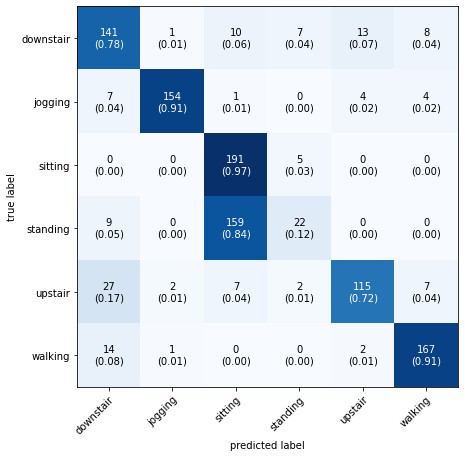

In [24]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

2. KNN

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predtrain = knn.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)
print('==================== KNN Model Training Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== KNN Model Training Phase ====================

Train accuracy   :  0.9099206349206349 



In [26]:
#test your model
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = knn.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== KNN Model Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== KNN Model Test Phase ====================

Test accuracy   :  0.8462962962962963 

              precision    recall  f1-score   support

   downstair    0.82432   0.67778   0.74390       180
     jogging    0.98000   0.86471   0.91875       170
     sitting    0.82222   0.94388   0.87886       196
    standing    0.82011   0.81579   0.81794       190
     upstair    0.78049   0.80000   0.79012       160
     walking    0.86765   0.96196   0.91237       184

    accuracy                        0.84630      1080
   macro avg    0.84913   0.84402   0.84366      1080
weighted avg    0.84859   0.84630   0.84449      1080
 

[[122   0   2  20  24  12]
 [  6 147   0   0  10   7]
 [  0   0 185  11   0   0]
 [  0   0  35 155   0   0]
 [ 16   3   2   3 128   8]
 [  4   0   1   0   2 177]]


(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

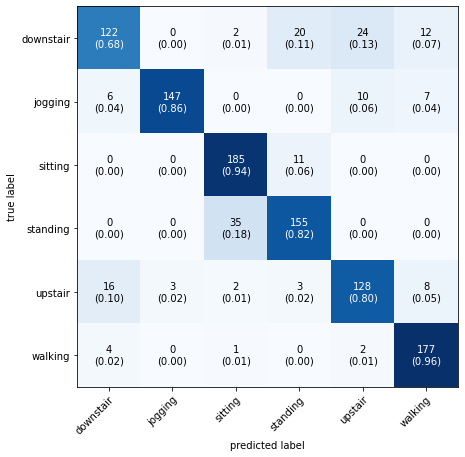

In [27]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

3. RF

In [28]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1, min_samples_split = 3, min_samples_leaf=2)
rf.fit(X_train, y_train)
predtrain = rf.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)
print('==================== RF Model Training Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== RF Model Training Phase ====================

Train accuracy   :  0.9718253968253968 



In [29]:
#test your model
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = rf.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== RF Model Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names=target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== RF Model Test Phase ====================

Test accuracy   :  0.8546296296296296 

              precision    recall  f1-score   support

   downstair    0.75789   0.80000   0.77838       180
     jogging    0.93711   0.87647   0.90578       170
     sitting    0.93617   0.89796   0.91667       196
    standing    0.85075   0.90000   0.87468       190
     upstair    0.81379   0.73750   0.77377       160
     walking    0.83756   0.89674   0.86614       184

    accuracy                        0.85463      1080
   macro avg    0.85555   0.85144   0.85257      1080
weighted avg    0.85665   0.85463   0.85474      1080
 

[[144   5   0   5  16  10]
 [  9 149   0   0   4   8]
 [  0   0 176  20   0   0]
 [  7   0  12 171   0   0]
 [ 20   3   0   5 118  14]
 [ 10   2   0   0   7 165]]


(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

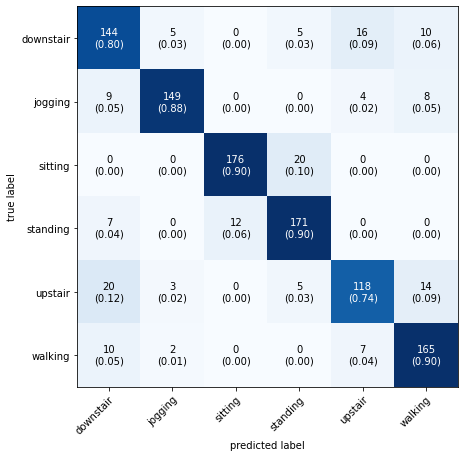

In [30]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

4. XGBoost 

In [31]:
XGB = GradientBoostingClassifier()
XGB.fit(X_train, y_train)
predtrain = XGB.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)
print('==================== XGB Model Training Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== XGB Model Training Phase ====================

Train accuracy   :  0.976984126984127 



In [32]:
#test your model
XGB.fit(X_train, y_train)
pred = XGB.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = XGB.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== XGB Model Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== XGB Model Test Phase ====================

Test accuracy   :  0.8296296296296296 

              precision    recall  f1-score   support

   downstair    0.73184   0.72778   0.72981       180
     jogging    0.92994   0.85882   0.89297       170
     sitting    0.91005   0.87755   0.89351       196
    standing    0.82587   0.87368   0.84910       190
     upstair    0.74214   0.73750   0.73981       160
     walking    0.83590   0.88587   0.86016       184

    accuracy                        0.82963      1080
   macro avg    0.82929   0.82687   0.82756      1080
weighted avg    0.83116   0.82963   0.82988      1080
 

[[131   7   0   4  26  12]
 [  8 146   0   0   9   7]
 [  0   0 172  24   0   0]
 [  6   0  17 166   1   0]
 [ 20   3   0   6 118  13]
 [ 14   1   0   1   5 163]]


(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

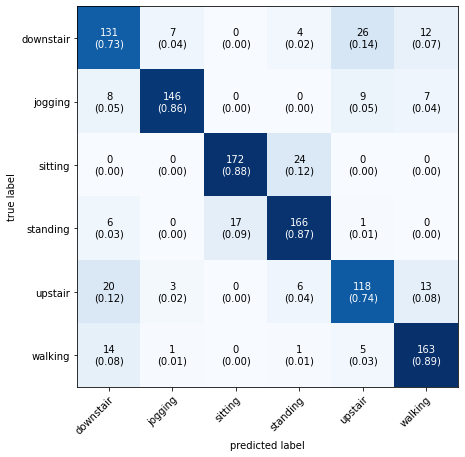

In [33]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

5. LightGBM

In [34]:
lgbm = LGBMClassifier(max_depth=8, objective='multiclass', metric='multi_logloss', num_class='9', random_state=5)
lgbm.fit(X_train, y_train)
predtrain = lgbm.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)
print('==================== LGBM Model Training Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== LGBM Model Training Phase ====================

Train accuracy   :  1.0 



In [35]:
#test your model
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = lgbm.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== LGBM Model Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== LGBM Model Test Phase ====================

Test accuracy   :  0.9055555555555556 

              precision    recall  f1-score   support

   downstair    0.88690   0.82778   0.85632       180
     jogging    0.95122   0.91765   0.93413       170
     sitting    0.92821   0.92347   0.92583       196
    standing    0.89119   0.90526   0.89817       190
     upstair    0.85714   0.90000   0.87805       160
     walking    0.91667   0.95652   0.93617       184

    accuracy                        0.90556      1080
   macro avg    0.90522   0.90511   0.90478      1080
weighted avg    0.90594   0.90556   0.90537      1080
 

[[149   4   0   4  16   7]
 [  5 156   0   0   5   4]
 [  0   0 181  15   0   0]
 [  4   0  13 172   1   0]
 [  6   2   1   2 144   5]
 [  4   2   0   0   2 176]]


(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

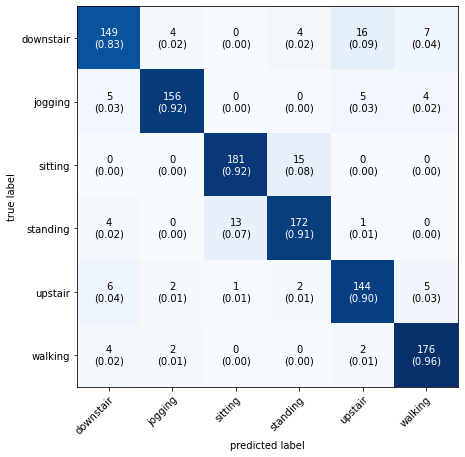

In [36]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

6. ExtraTrees

In [37]:
X, y = make_classification(n_features=12, random_state=0)
et = ExtraTreesClassifier(n_estimators=100, random_state=0)
et.fit(X_train, y_train)
predtrain = et.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)
print('==================== ET Model Training Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== ET Model Training Phase ====================

Train accuracy   :  1.0 



In [38]:
#ExtraTreesClassifier(random_state=0)
et_features = list(range(0, X.shape[1]))
#test your model
et.fit(X_train, y_train)
pred = et.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = et.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== ET Model Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== ET Model Test Phase ====================

Test accuracy   :  0.9111111111111111 

              precision    recall  f1-score   support

   downstair    0.87222   0.87222   0.87222       180
     jogging    0.99351   0.90000   0.94444       170
     sitting    0.92821   0.92347   0.92583       196
    standing    0.87562   0.92632   0.90026       190
     upstair    0.88050   0.87500   0.87774       160
     walking    0.92670   0.96196   0.94400       184

    accuracy                        0.91111      1080
   macro avg    0.91279   0.90983   0.91075      1080
weighted avg    0.91258   0.91111   0.91130      1080
 

[[157   1   0   4  13   5]
 [  8 153   0   1   4   4]
 [  0   0 181  15   0   0]
 [  0   0  14 176   0   0]
 [ 10   0   0   5 140   5]
 [  5   0   0   0   2 177]]


(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

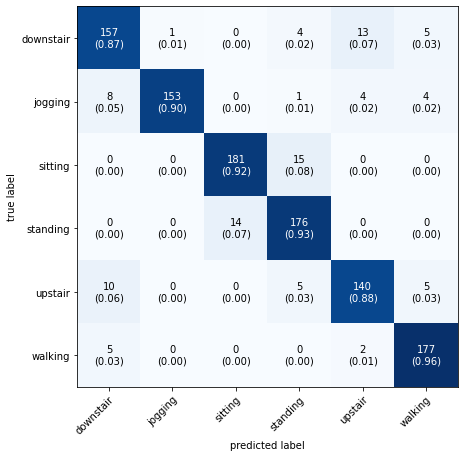

In [39]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

7. CatBoost

In [40]:
clf = CatBoostClassifier(iterations=12)
clf.fit(X_train, y_train, verbose=False)
predtrain = clf.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)
print('==================== CB Model Training Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== CB Model Training Phase ====================

Train accuracy   :  0.8293650793650794 



In [41]:
#test your model
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = clf.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== CLF Model Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

Learning rate set to 0.5
0:	learn: 1.3444968	total: 71.1ms	remaining: 782ms
1:	learn: 1.1557607	total: 107ms	remaining: 535ms
2:	learn: 1.0067767	total: 143ms	remaining: 430ms
3:	learn: 0.9164788	total: 181ms	remaining: 362ms
4:	learn: 0.8221495	total: 215ms	remaining: 300ms
5:	learn: 0.7814196	total: 251ms	remaining: 251ms
6:	learn: 0.7363484	total: 281ms	remaining: 201ms
7:	learn: 0.6907045	total: 307ms	remaining: 154ms
8:	learn: 0.6523366	total: 344ms	remaining: 115ms
9:	learn: 0.6227024	total: 394ms	remaining: 78.7ms
10:	learn: 0.5981308	total: 442ms	remaining: 40.2ms
11:	learn: 0.5675869	total: 480ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.3444968	total: 68.8ms	remaining: 757ms
1:	learn: 1.1557607	total: 96ms	remaining: 480ms
2:	learn: 1.0067767	total: 124ms	remaining: 373ms
3:	learn: 0.9164788	total: 152ms	remaining: 305ms
4:	learn: 0.8221495	total: 182ms	remaining: 255ms
5:	learn: 0.7814196	total: 208ms	remaining: 208ms
6:	learn: 0.7363484	total: 239ms	remaining: 171

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

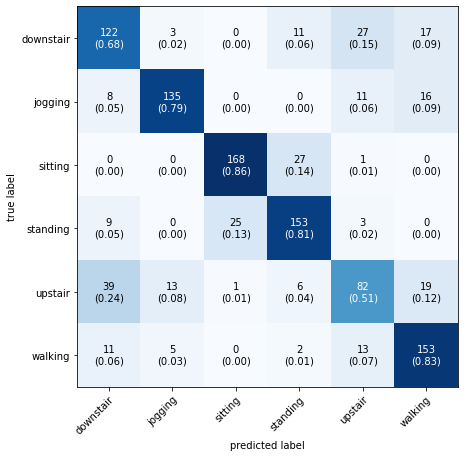

In [42]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

# Stacking 1

In [43]:
#stack together individual model --> estimator
cart = DecisionTreeClassifier()
eclf = [('rf',rf), ('classifier', classifier), ('cart', cart), ('knn', knn)]
#logistic regression used --> final estimator
lr = LogisticRegression(penalty='elasticnet', l1_ratio=1, solver='saga', max_iter=1000)

In [44]:
sclf = StackingClassifier(estimators = eclf, final_estimator = lr) 
sclf.fit(X_train, y_train)

#Train Phase
predtrain = sclf.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)

print('==================== Ensemble Model Train Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== Ensemble Model Train Phase ====================

Train accuracy   :  0.9833333333333333 



In [45]:
#Test Phase
sclf.fit(X_train, y_train)
pred = sclf.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = sclf.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== Ensemble Model Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== Ensemble Model Test Phase ====================

Test accuracy   :  0.8935185185185185 

              precision    recall  f1-score   support

   downstair    0.85632   0.82778   0.84181       180
     jogging    0.95706   0.91765   0.93694       170
     sitting    0.93684   0.90816   0.92228       196
    standing    0.86935   0.91053   0.88946       190
     upstair    0.80814   0.86875   0.83735       160
     walking    0.95604   0.94565   0.95082       184

    accuracy                        0.89722      1080
   macro avg    0.89729   0.89642   0.89644      1080
weighted avg    0.89893   0.89722   0.89768      1080
 

[[149   2   0   5  21   3]
 [  5 156   0   0   6   3]
 [  0   0 178  18   0   0]
 [  3   0  12 173   2   0]
 [ 12   4   0   3 139   2]
 [  5   1   0   0   4 174]]


# Stacking 2

In [53]:
#stack together individual model --> estimator
cart = DecisionTreeClassifier()
eclf = [('rf',rf), ('classifier', classifier), ('cart', cart), ('knn', knn), ('XGB', XGB)]
#logistic regression used --> final estimator
lr = LogisticRegression(penalty='elasticnet', l1_ratio=1, solver='saga', max_iter=1000)

In [54]:
sclf = StackingClassifier(estimators = eclf, final_estimator = lr) 
sclf.fit(X_train, y_train)

#Train Phase
predtrain = sclf.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)

print('==================== Ensemble Model + XGBoost Train Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== Ensemble Model + XGBoost Train Phase ====================

Train accuracy   :  0.9857142857142858 



In [55]:
#Test Phase
sclf.fit(X_train, y_train)
pred = sclf.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = sclf.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== Ensemble Model + XGBoost Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== Ensemble Model + XGBoost Test Phase ====================

Test accuracy   :  0.9018518518518519 

              precision    recall  f1-score   support

   downstair    0.85143   0.82778   0.83944       180
     jogging    0.95706   0.91765   0.93694       170
     sitting    0.92670   0.90306   0.91473       196
    standing    0.87310   0.90526   0.88889       190
     upstair    0.81871   0.87500   0.84592       160
     walking    0.96175   0.95652   0.95913       184

    accuracy                        0.89815      1080
   macro avg    0.89812   0.89755   0.89751      1080
weighted avg    0.89948   0.89815   0.89850      1080
 

[[149   2   0   5  21   3]
 [  6 156   0   0   6   2]
 [  0   0 177  19   0   0]
 [  4   0  13 172   1   0]
 [ 12   4   1   1 140   2]
 [  4   1   0   0   3 176]]


# Stacking 3

In [47]:
#stack together individual model --> estimator
cart = DecisionTreeClassifier()
eclf = [('rf',rf), ('classifier', classifier), ('cart', cart), ('knn', knn), ('lgbm', lgbm)]
#logistic regression used --> final estimator
lr = LogisticRegression(penalty='elasticnet', l1_ratio=1, solver='saga', max_iter=5000)

In [48]:
sclf = StackingClassifier(estimators = eclf, final_estimator = lr) 
sclf.fit(X_train, y_train)

#Train Phase
predtrain = sclf.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)

print('==================== Ensemble Model + LightGBM Train Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== Ensemble Model + LightGBM Train Phase ====================

Train accuracy   :  0.998015873015873 



In [49]:
#Test Phase
sclf.fit(X_train, y_train)
pred = sclf.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = sclf.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== Ensemble Model + LightGBM Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== Ensemble Model + LightGBM Test Phase ====================

Test accuracy   :  0.9064814814814814 

              precision    recall  f1-score   support

   downstair    0.88757   0.83333   0.85960       180
     jogging    0.96319   0.92353   0.94294       170
     sitting    0.92708   0.90816   0.91753       196
    standing    0.87879   0.91579   0.89691       190
     upstair    0.83041   0.88750   0.85801       160
     walking    0.94118   0.95652   0.94879       184

    accuracy                        0.90463      1080
   macro avg    0.90470   0.90414   0.90396      1080
weighted avg    0.90576   0.90463   0.90475      1080
 

[[150   1   0   4  20   5]
 [  5 157   0   0   5   3]
 [  0   0 178  18   0   0]
 [  2   0  13 174   1   0]
 [  8   4   1   2 142   3]
 [  4   1   0   0   3 176]]


# Stacking 4

In [50]:
#stack together individual model --> estimator
cart = DecisionTreeClassifier()
eclf = [('rf',rf), ('classifier', classifier), ('cart', cart), ('knn', knn), ('et', et)]
#logistic regression used --> final estimator
lr = LogisticRegression(penalty='elasticnet', l1_ratio=1, solver='saga', max_iter=5000)

In [51]:
sclf = StackingClassifier(estimators = eclf, final_estimator = lr) 
sclf.fit(X_train, y_train)

#Train Phase
predtrain = sclf.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)

print('=================== Ensemble Model + ExtraTree Train Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

=================== Ensemble Model + ExtraTree Train Phase ====================

Train accuracy   :  1.0 



In [52]:
#Test Phase
sclf.fit(X_train, y_train)
pred = sclf.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = sclf.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== Ensemble Model + ExtraTree Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== Ensemble Model + ExtraTree Test Phase ====================

Test accuracy   :  0.9074074074074074 

              precision    recall  f1-score   support

   downstair    0.89017   0.85556   0.87252       180
     jogging    0.98113   0.91765   0.94833       170
     sitting    0.91414   0.92347   0.91878       196
    standing    0.89529   0.90000   0.89764       190
     upstair    0.82857   0.90625   0.86567       160
     walking    0.94565   0.94565   0.94565       184

    accuracy                        0.90833      1080
   macro avg    0.90916   0.90810   0.90810      1080
weighted avg    0.91007   0.90833   0.90871      1080
 

[[154   1   0   4  17   4]
 [  5 156   0   0   7   2]
 [  0   0 181  15   0   0]
 [  1   0  16 171   2   0]
 [  8   1   1   1 145   4]
 [  5   1   0   0   4 174]]


# Stacking 5

In [56]:
#stack together individual model --> estimator
cart = DecisionTreeClassifier()
eclf = [('rf',rf), ('classifier', classifier), ('cart', cart), ('knn', knn), ('clf', clf)]
#logistic regression used --> final estimator
lr = LogisticRegression(penalty='elasticnet', l1_ratio=1, solver='saga', max_iter=1000)

In [57]:
sclf = StackingClassifier(estimators = eclf, final_estimator = lr) 
sclf.fit(X_train, y_train)

#Train Phase
predtrain = sclf.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)

print('==================== Ensemble Model + CatBoost Train Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

Learning rate set to 0.5
0:	learn: 1.3444968	total: 53.9ms	remaining: 593ms
1:	learn: 1.1557607	total: 68.7ms	remaining: 343ms
2:	learn: 1.0067767	total: 83.2ms	remaining: 250ms
3:	learn: 0.9164788	total: 97.2ms	remaining: 194ms
4:	learn: 0.8221495	total: 112ms	remaining: 157ms
5:	learn: 0.7814196	total: 127ms	remaining: 127ms
6:	learn: 0.7363484	total: 142ms	remaining: 102ms
7:	learn: 0.6907045	total: 157ms	remaining: 78.5ms
8:	learn: 0.6523366	total: 175ms	remaining: 58.4ms
9:	learn: 0.6227024	total: 196ms	remaining: 39.2ms
10:	learn: 0.5981308	total: 213ms	remaining: 19.3ms
11:	learn: 0.5675869	total: 229ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.2972772	total: 16.4ms	remaining: 180ms
1:	learn: 1.1121852	total: 30ms	remaining: 150ms
2:	learn: 0.9971951	total: 43.6ms	remaining: 131ms
3:	learn: 0.9100912	total: 57.5ms	remaining: 115ms
4:	learn: 0.8381374	total: 72.2ms	remaining: 101ms
5:	learn: 0.7817523	total: 86ms	remaining: 86ms
6:	learn: 0.7224069	total: 101ms	remainin

In [58]:
#Test Phase
sclf.fit(X_train, y_train)
pred = sclf.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = sclf.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== Ensemble Model + CatBoost Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

Learning rate set to 0.5
0:	learn: 1.3444968	total: 35.1ms	remaining: 386ms
1:	learn: 1.1557607	total: 60.7ms	remaining: 304ms
2:	learn: 1.0067767	total: 88.4ms	remaining: 265ms
3:	learn: 0.9164788	total: 130ms	remaining: 261ms
4:	learn: 0.8221495	total: 163ms	remaining: 228ms
5:	learn: 0.7814196	total: 194ms	remaining: 194ms
6:	learn: 0.7363484	total: 227ms	remaining: 162ms
7:	learn: 0.6907045	total: 274ms	remaining: 137ms
8:	learn: 0.6523366	total: 326ms	remaining: 109ms
9:	learn: 0.6227024	total: 379ms	remaining: 75.9ms
10:	learn: 0.5981308	total: 409ms	remaining: 37.2ms
11:	learn: 0.5675869	total: 441ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.2972772	total: 23.3ms	remaining: 256ms
1:	learn: 1.1121852	total: 37.8ms	remaining: 189ms
2:	learn: 0.9971951	total: 52.2ms	remaining: 157ms
3:	learn: 0.9100912	total: 93.4ms	remaining: 187ms
4:	learn: 0.8381374	total: 113ms	remaining: 158ms
5:	learn: 0.7817523	total: 135ms	remaining: 135ms
6:	learn: 0.7224069	total: 169ms	remainin